# Framework Workflow

This notebook presents the step-by-step workflow of the framework used in the article DOI: [insert DOI here].

It is divided into different stages and sub-stages, ensuring full reproducibility of the analyses conducted in the work.

---

## Preprocessing Stage

This stage includes the visualization and decisions made regarding different observations in the dataset, such as:

- Removal of players with low minutes
- Removal of highly correlated variables
- Calculation of the four moments  
  *(Note: For this, we have a separate dataset called `four_moment_nba.csv`, available on Google Drive)*
- Analysis of heavy tails
- Min-Max transformation
- Use of the UMAP dimensionality reduction algorithm

---

## Clustering Stage

This stage includes the visualization and decisions made regarding different behaviors of the data related to clustering:

- Visualization of silhouette score and inertia
- Silhouette score analysis for specific groups using a blade (knife) plot
- Final selection of the optimal number of clusters

---

## Results Stage

Finally, all results presented in the study are included here, except for the UBMG plot, which was created directly in LaTeX.  
However, the relevant information is also included in one of the notebook cells.

In [12]:
%run ./utils.ipynb

✅ pandas is already installed.
✅ numpy is already installed.
✅ scikit-learn is already installed.
✅ scipy is already installed.
✅ umap-learn is already installed.
✅ matplotlib is already installed.
✅ seaborn is already installed.
✅ plotly is already installed.
✅ nbformat is already installed.


#### Preprocessing Stage

In [13]:
dataset = pd.read_csv("nba_dataset.csv", dtype={"PLAYER_ID": str, "PLAYER_NAME": str, "SEASON_ID": str})

##### Removal of players with low minutes

In [14]:
cdf_graph(dataset, "MIN_TOTAL", 'minutes_cdf')

# Based on the graph, remove all players with less than 400 minutes in a seasson
dataset = dataset[dataset["MIN_TOTAL"] >= 400]
metadata = dataset.iloc[:, -12:].copy()
dataset_features = dataset.iloc[:, :-12].copy()

##### Removal of high correlated features

In [15]:
# NOTE: This step was made to all features, but we gonna use as example the SHOT LOCATION METRICS

shot_locations_metrics = [
    "CLOSE_SHOT_M_MEAN", "CLOSE_SHOT_U_MEAN", "CLOSE_SHOT_A_MEAN", "CLOSE_SHOT_PCT_MEAN",
    "MID_RANGE_SHOT_M_MEAN", "MID_RANGE_SHOT_U_MEAN", "MID_RANGE_SHOT_A_MEAN", "MID_RANGE_SHOT_PCT_MEAN",
    "LONG_MID_RANGE_SHOT_M_MEAN", "LONG_MID_RANGE_SHOT_U_MEAN", "LONG_MID_RANGE_SHOT_A_MEAN", "LONG_MID_RANGE_SHOT_PCT_MEAN",
    "THREE_POINT_SHOT_M_MEAN", "THREE_POINT_SHOT_U_MEAN", "THREE_POINT_SHOT_A_MEAN", "THREE_POINT_SHOT_PCT_MEAN"
]

# High correlation visualization
matrix_of_correlation_graph(dataset_features, shot_locations_metrics)

# Pca to remove high correlationated features 
plot_pca_loadings(dataset_features, shot_locations_metrics)

features_to_remove = [
    "MIN",
    "FGM",
    "FGA",
    "FG2M",
    "FG2U",
    "FG2A",
    #"FG3M",
    "FG3U",
    "FG3A",
    "FTM",
    "FTA",
    #"FTU",
    #"CLOSE_SHOT_M",
    "CLOSE_SHOT_U",
    "CLOSE_SHOT_A",
    "MID_RANGE_SHOT_M",
    #"MID_RANGE_SHOT_U",
    "MID_RANGE_SHOT_A",
    #"LONG_MID_RANGE_SHOT_M",
    "LONG_MID_RANGE_SHOT_U",
    "LONG_MID_RANGE_SHOT_A",
    "T_MID_RANGE_SHOT_M",
    "T_MID_RANGE_SHOT_U",
    "T_MID_RANGE_SHOT_A",
    "THREE_POINT_SHOT_M",
    "THREE_POINT_SHOT_U",
    "THREE_POINT_SHOT_A",
    #"OREB",
    #"DREB",
    "REB",
    #"AST",
    #"STL",
    #"BLK",
    "TO",
    #"PF",
    #"PTS",
    "PLUS_MINUS",
    "E_OFF_RATING",
    #"OFF_RATING",
    "E_DEF_RATING",
    #"DEF_RATING",
    "E_NET_RATING",
    #"NET_RATING",
    "AST_TOV",
    "E_PACE",
    "PACE",
    "PACE_PER40",
    "POSS",

    #"CLOSE_SHOT_PCT",
    #"MID_RANGE_SHOT_PCT",
    "LONG_MID_RANGE_SHOT_PCT",
    "T_MID_RANGE_SHOT_PCT",
    "THREE_POINT_SHOT_PCT",
    #"FG_PCT",
    "FG2_PCT",
    "FG3_PCT",
    "FT_PCT",
    "AST_PCT",
    #"AST_RATIO",
    "PIE",
    "OREB_PCT",
    #"DREB_PCT",
    "REB_PCT",
    #"TM_TOV_PCT",
    "EFG_PCT",
    "TS_PCT",
    "USG_PCT",
    "E_USG_PCT"
]

columns_to_remove = [
    col for col in dataset.columns
    if any(col == base or col.startswith(f"{base}_") for base in features_to_remove)
]

print(columns_to_remove)

CLOSE_SHOT_M_MEAN: PC1=0.2239, PC2=-0.2620
CLOSE_SHOT_U_MEAN: PC1=0.2417, PC2=-0.2304
CLOSE_SHOT_A_MEAN: PC1=0.2371, PC2=-0.2553
CLOSE_SHOT_PCT_MEAN: PC1=0.1457, PC2=-0.2305
MID_RANGE_SHOT_M_MEAN: PC1=0.3328, PC2=-0.0452
MID_RANGE_SHOT_U_MEAN: PC1=0.3396, PC2=-0.0790
MID_RANGE_SHOT_A_MEAN: PC1=0.3420, PC2=-0.0652
MID_RANGE_SHOT_PCT_MEAN: PC1=0.3133, PC2=-0.0022
LONG_MID_RANGE_SHOT_M_MEAN: PC1=0.2987, PC2=0.0984
LONG_MID_RANGE_SHOT_U_MEAN: PC1=0.2966, PC2=0.0850
LONG_MID_RANGE_SHOT_A_MEAN: PC1=0.3007, PC2=0.0916
LONG_MID_RANGE_SHOT_PCT_MEAN: PC1=0.2675, PC2=0.1526
THREE_POINT_SHOT_M_MEAN: PC1=0.0968, PC2=0.4186
THREE_POINT_SHOT_U_MEAN: PC1=0.1022, PC2=0.4103
THREE_POINT_SHOT_A_MEAN: PC1=0.1009, PC2=0.4165
THREE_POINT_SHOT_PCT_MEAN: PC1=0.0606, PC2=0.4263
['MIN_MEAN', 'MIN_VAR', 'MIN_SKEW', 'MIN_KUR', 'MIN_TOTAL', 'FGM_MEAN', 'FGM_VAR', 'FGM_SKEW', 'FGM_KUR', 'FGA_MEAN', 'FGA_VAR', 'FGA_SKEW', 'FGA_KUR', 'FG3U_MEAN', 'FG3U_VAR', 'FG3U_SKEW', 'FG3U_KUR', 'FG3A_MEAN', 'FG3A_VAR', 'FG3A_SKE

##### 4 moments of the distribuition

In [16]:
#NOTE
# The 4 moments is already calculated in the dataset to make it easy to use, here we just filtered the dataset
selected_dataset = dataset_features.drop(columns=columns_to_remove)

print(len(selected_dataset.columns))

84


##### Analysis of heavy tails

In [17]:
# Create a file summarizing the features
summarize_features(selected_dataset)

# Plot the distribution of each feature in batches
#plot_histograms_in_batches(selected_dataset, batch_size=10)

# Transform features with high skewness
dataset_transformed = transform_skewed_features(selected_dataset)

print(dataset_transformed.columns)

Transforming (log) column 'FG3M_MEAN' with skewness 1.0495
Transforming (log) column 'FG3M_VAR' with skewness 1.2007
Transforming (log) column 'FG3M_SKEW' with skewness 2.3431
Transforming (log) column 'FG3M_KUR' with skewness 3.9322
Transforming (log) column 'FTU_MEAN' with skewness 2.8049
Transforming (log) column 'FTU_VAR' with skewness 4.7233
Transforming (log) column 'FTU_SKEW' with skewness 1.4440
Transforming (log) column 'FTU_KUR' with skewness 3.5215
Transforming (log) column 'CLOSE_SHOT_M_MEAN' with skewness 1.3028
Transforming (log) column 'CLOSE_SHOT_M_VAR' with skewness 1.2047
Transforming (log) column 'CLOSE_SHOT_M_SKEW' with skewness 1.6502
Transforming (log) column 'CLOSE_SHOT_M_KUR' with skewness 7.9726
Transforming (log) column 'MID_RANGE_SHOT_U_MEAN' with skewness 1.6913
Transforming (log) column 'MID_RANGE_SHOT_U_VAR' with skewness 2.0919
Transforming (log) column 'MID_RANGE_SHOT_U_SKEW' with skewness 2.1398
Transforming (log) column 'MID_RANGE_SHOT_U_KUR' with skew

##### Normalization

In [18]:
dataset_transformed = pd.concat([
    dataset_transformed.reset_index(drop=True),
    metadata.reset_index(drop=True)
], axis=1)

dataset_scaled = time_fixer(dataset_transformed)

C:\Users\TULIO\AppData\Local\Temp\ipykernel_20680\500306809.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('SEASON_ID', group_keys=False).apply(scale_group)


##### Dimensionality reduction

In [19]:
# NOTE: We gonna need a SEED thoroug our next steps, here we selected on by a random selector.
# if you need a random seed use -> random.randint(0, 2**32 - 1)
# We go to use the one used in the paper!

seed=2610048211
dataset_embedding = umap_method(dataset_scaled, n_components=15, n_neighbors=5, random_state=seed)

c:\Users\TULIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


#### Clustering Stage

In [ ]:
# Plot the silhouette score of every cluster
plot_silhouette_analysis(dataset_embedding)

# Plot the inertia score of every cluster
plot_inertia_analysis(dataset_embedding)

# Plot blade graph for a specific cluster
plot_silhouette_blades(dataset_embedding, 5, seed=seed)


# Final clusterization
kmeans_labels, score, outliers, centroid, inertia = kmeans_method(
    embedding=dataset_embedding,
    n_clusters=5,
    seed=seed,
    plot=False
)

# Final organization of the dataset to use throug the result section
raw_features, features_with_meta, minmax_normalized = formatted_data_to_analysis(features=dataset_scaled,metadata=metadata,labels=kmeans_labels)

#### Results Stage

Feature: FG3M_MEAN, Gini Index: 0.4732478731195785
Feature: LONG_MID_RANGE_SHOT_M_MEAN, Gini Index: 0.39839551870733
Feature: BLK_MEAN, Gini Index: 0.34656929688852683
Feature: AST_RATIO_MEAN, Gini Index: 0.2959849567267837
Feature: MID_RANGE_SHOT_U_MEAN, Gini Index: 0.28320981411053914
Feature: FTU_MEAN, Gini Index: 0.28251461196153926
Feature: MID_RANGE_SHOT_PCT_MEAN, Gini Index: 0.27520814912939595
Feature: DREB_PCT_MEAN, Gini Index: 0.24999581353056538
Feature: TM_TOV_PCT_MEAN, Gini Index: 0.23039909834797076
Feature: PF_MEAN, Gini Index: 0.20709897146203504


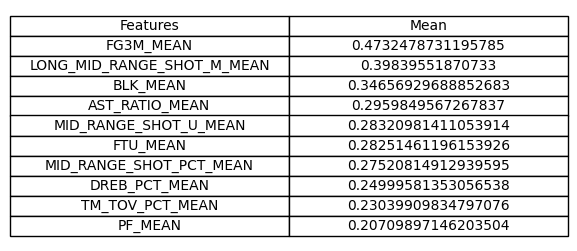

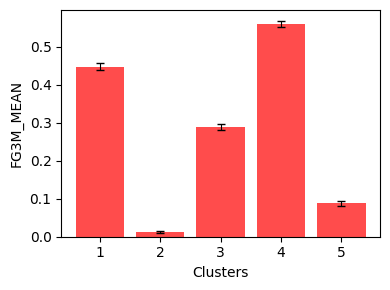

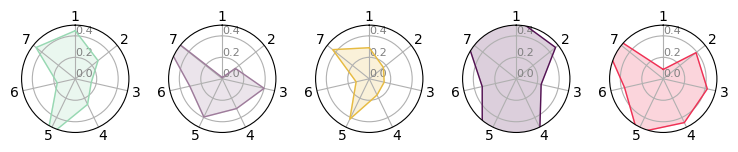

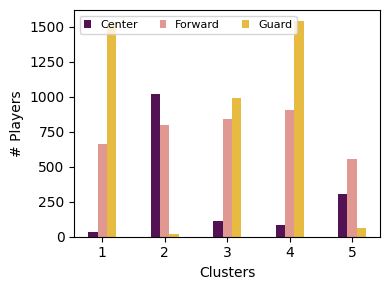

In [21]:
cluster_size(features_with_meta, "cluster_size")

cluster_members_by_year(features_with_meta)

cluster_members_total(features_with_meta)

awards_by_cluster(features_with_meta)

gini_most(minmax_normalized, 10)

ginix_diference_plot(features_with_meta, "FG3M_MEAN", "fg3m")

plotradar(minmax_normalized, colors)

# Select specific seasons for the UBMG graph
specific_seasons = ["2019-20", "2020-21", "2021-22", "2022-23", "2023-24"]
# Analyze cluster migration percentages for the selected seasons
ubmg_results = analyze_cluster_migration_percentages(features_with_meta, specific_seasons, n_clusters=5)
# To view the resulting table, simply print it
# print(ubmg_results)

plot_players_position_by_cluster(features_with_meta)


# Maps of the closest players in each centroid
shot_map_features = pd.read_csv("shot_map_features.csv", dtype={"PLAYER_ID": str})
plot_players_shot_map(shot_map_features, "2039", "shot_map_cluster_1")
plot_players_shot_map(shot_map_features, "271", "shot_map_cluster_2")
plot_players_shot_map(shot_map_features, "966", "shot_map_cluster_3")
plot_players_shot_map(shot_map_features, "101145", "shot_map_cluster_4")
plot_players_shot_map(shot_map_features, "913", "shot_map_cluster_5")
